## <span style=color:red> Chaos </span>

#### We have learned Two Stable System Behaviors 

1. Converge to Equilibrium
2. Stable Limit Cycle

#### Is there any other type? 

Chaos System$\begin{cases}
\text{Bounded Output}\\
\text{Not Periodic}
\end{cases}$

## <span style=color:red> Romeo Juliet System (Continuous Time Example)</span>

$ R' = R + 0.1J$

$ J' = -J-T$ 

$ T' = 0.1-cT+RT$

Let $c = 14,R(0)=5, J(0)=5, T(0)=1$

In [1]:
_=var('J,R,T')
c = 14
jprime = R+0.1*J
rprime = -J-T
tprime = 0.1-c*T+R*T


In [2]:
time = srange(0,100,0.1)
sol = desolve_odeint([jprime,rprime,tprime],dvars = [J,R,T],times = time,ics = [5,5,1])

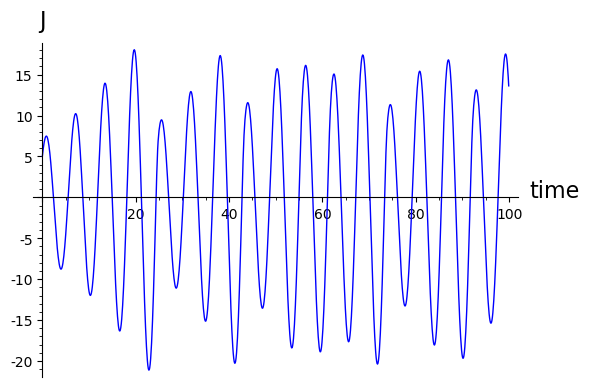

In [85]:
list_plot(zip(time,sol[:,0]),plotjoined=True,axes_labels=['time','J'])

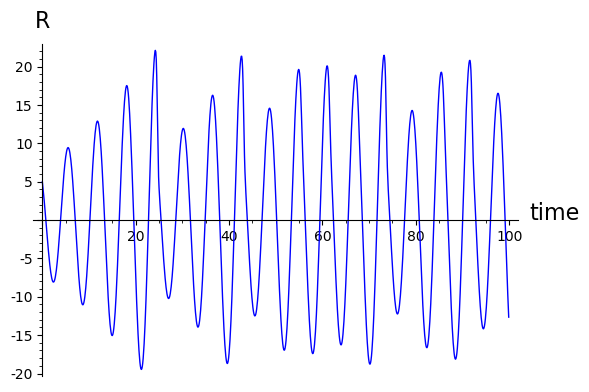

In [86]:
list_plot(zip(time,sol[:,1]),plotjoined=True,axes_labels=['time','R'])

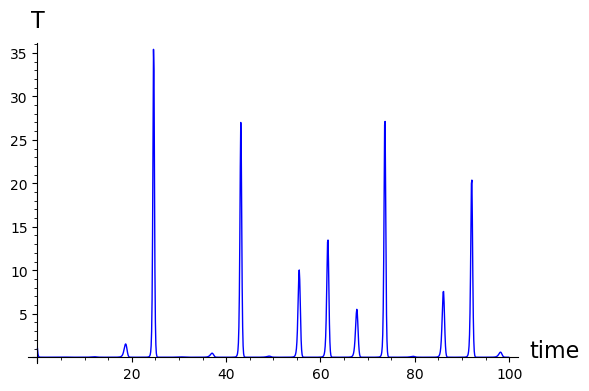

In [87]:
list_plot(zip(time,sol[:,2]),plotjoined=True,axes_labels=['time','T'])

### It do not converge to any equilibrium point, nor stable limit cycle

### However, it is still bounded!

In [62]:
list_plot(sol,plotjoined=True)

Graphics3d Object

## <span style=color:red> Initial Values Matters a Lot </span>

$ R' = R + 0.1J$

$ J' = -J-T$ 

$ T' = 0.1-cT+RT$

In [69]:
time = srange(0,500,0.1)
sol1 = desolve_odeint([jprime,rprime,tprime],dvars = [J,R,T],times = time,ics = [5,5,1])
sol2 = desolve_odeint([jprime,rprime,tprime],dvars = [J,R,T],times = time,ics = [5.1,5.1,1.1])

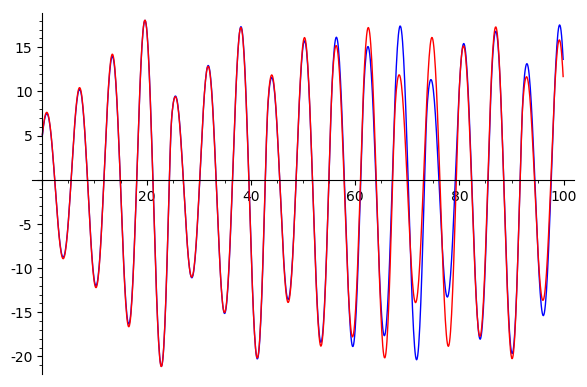

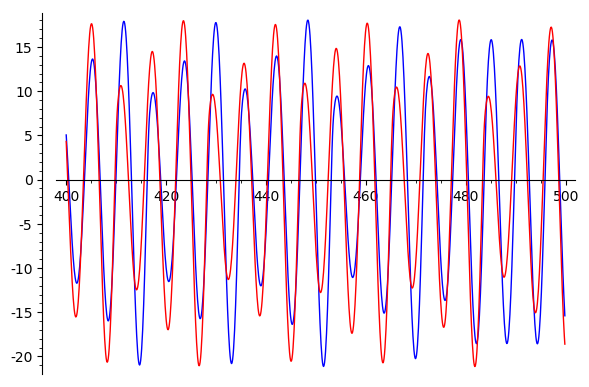

In [76]:
fig1 = list_plot(zip(time[0:1000],sol1[0:1000,0]),plotjoined=True)+list_plot(zip(time[0:1000],sol2[0:1000,0]),plotjoined=True,color='red')
fig2 = list_plot(zip(time[4000:-1],sol1[4000:-1,0]),plotjoined=True)+list_plot(zip(time[4000:-1],sol2[4000:-1,0]),plotjoined=True,color='red')

show(fig1)
show(fig2)

In [78]:
list_plot(sol1,plotjoined=True,color='blue')+list_plot(sol2,plotjoined=True,color='red')

Graphics3d Object

In [115]:
time = srange(0,100,0.1)
sol = desolve_odeint([jprime,rprime,tprime],dvars = [J,R,T],times = time,ics = [5,8,2])
fig1 = list_plot(sol,plotjoined=True)
sol = desolve_odeint([jprime,rprime,tprime],dvars = [J,R,T],times = time,ics = [1,4,3])
fig2 = list_plot(sol,plotjoined=True,color='red')

sol = desolve_odeint([jprime,rprime,tprime],dvars = [J,R,T],times = time,ics = [1.3,-1.6,50])
fig3 = list_plot(sol,plotjoined=True,color='green')
show(fig1+fig2+fig3)

Graphics3d Object

## <span style=color:red>Review: Jacobian </span>

## $\begin{bmatrix}d g(X,Y)\\dh(X,Y)\end{bmatrix} = \begin{bmatrix}\frac{\partial g(X,Y)}{\partial X}&\frac{\partial g(X,Y)}{\partial Y}\\\frac{\partial h(X,Y)}{\partial X}&\frac{\partial h(X,Y)}{\partial Y}\end{bmatrix}\begin{bmatrix}dx\\dy\end{bmatrix}$

#### If you are at equilibrium point $(x_0,y_0)$

#### $g(x_0,y_0)=0 ,h(x_0,y_0)=0$

### For a point nearby $(x_0,y_0)$, e.g., $(x_1,y_1)$

### $g(x_1,y_1) = dg(x,y)$

### $h(x_1,y_1) = dh(x,y)$

## $\begin{bmatrix}g(x_1,y_1)\\h(x_1,y_1)\end{bmatrix} = \begin{bmatrix}\frac{\partial g(X,Y)}{\partial X}&\frac{\partial g(X,Y)}{\partial Y}\\\frac{\partial h(X,Y)}{\partial X}&\frac{\partial h(X,Y)}{\partial Y}\end{bmatrix}_{X=x_0,Y=y_0}\begin{bmatrix}(x_1-x_0)\\(y_1-y_0)\end{bmatrix}$

#### <span style=color:red> Partial Derivative </span>

### $g(X,Y,Z)=(X^2-Y^2)(4X+2Z)-\frac{YZ^3}{X+Z^3}$

#### Find: $\frac{\partial g}{\partial Z}$

#### Two Rules:

#### Product Rule: $\frac{d(ab)}{dx} = \frac{da}{dx}b + a\frac{db}{dx}$    

##### $\frac{dg}{dZ} = (X^2-Y^2)\frac{d(4X+2Z)}{dZ}-\frac{d(YZ^3(X+Z^3)^{-1})}{dZ}$

#### $=2(X^2-Y^2)-\frac{d(YZ^3)}{dZ}(X+Z^3)^{-1}-YZ^3\frac{d(X+Z^3)^{-1}}{dZ}$

#### But you can also do in this way:

#### $\frac{d\frac{num}{den}}{dx}$

#### $= \frac{\frac{d(num)}{dx}den - num\frac{d(den)}{dx}}{den^2}$

#### $\frac{dg}{dZ} = 2(X^2-Y^2)- \frac{3YZ^2(X+Z^3)-YZ^33Z^2}{(X+Z^3)^2}$

#### $=2(X^2-Y^2)-\frac{3XYZ^2}{(X+Z^3)^2}$ 

## <span style=color:red> Optimization </span>

#### Suppose the number of sparrows is defined by two parameters:

#### $f(x,y)=9x^2+6y^2-4x^3-2y^2-3x^2y^2$

#### At which point in the state space will the population be stable?

In [5]:
_= var('x,y,z')
f = 9*x^2+6*y^2-4*x^3-2*y^2-3*x^2*y^2
fx = diff(f,x)
fy = diff(f,y)

In [16]:
plot3d(-1*f+10^8,(x,-100,100),(y,-100,100))  #I flip the z, so maximum is the lowest point

Graphics3d Object

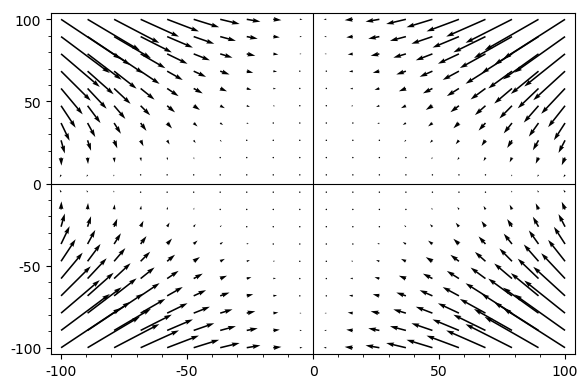

In [15]:
plot_vector_field((fx,fy),(x,-100,100),(y,-100,100))

In [17]:
plot3d(f,(x,-100,100),(y,-100,100))

Graphics3d Object

#### Highest point: Local maximum

#### $X' =0, Y' = 0$

#### Eigen values of Hessian Matrix <0